## Final Project AI

In [2]:
# INSTALL PYTORCH
!pip install torch==1.8.2 torchvision==0.9.2 torchaudio===0.8.2 --extra-index-url https://download.pytorch.org/whl/lts/1.8/cu111

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/lts/1.8/cu111


In [3]:
# Mengambil data ultralytics yolov5
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
# Pindah derektori dan menginstall library yang ada didalam requirements.txt

!cd yolov5 & pip install -r requirements.txt

In [5]:
# Mengimport library
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [31]:
# Membuat model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s6')

Using cache found in C:\Users\surhe/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-6-24 Python-3.9.7 torch-1.8.2+cu111 CUDA:0 (NVIDIA GeForce MX450, 2048MiB)



  0%|          | 0.00/24.8M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s6 summary: 280 layers, 12612508 parameters, 0 gradients
Adding AutoShape... 


In [26]:
# Hasil Model 
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 16, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1))
           

In [27]:
# Membuat Variable img
img = "yolov5/data/images/bottle.jpg"

In [28]:
# Menggabungakn model dari YOLOv5 dengan variable img
results = model(img)
results.print()

image 1/1: 1510x1000 1 bottle
Speed: 38.2ms pre-process, 179.3ms inference, 3.5ms NMS per image at shape (1, 3, 640, 448)


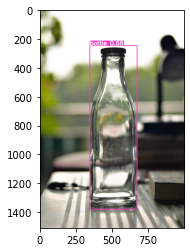

In [29]:
# Menampilkan gambar yang telah dideteksi oleh model YOLOv5
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [30]:
# Menampilkan Object Detection Secara Real Time Dan Video kegiatan Di Shibuya Jepang
cap = cv2.VideoCapture("yolov5/data/images/traffic.mp4")
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [32]:
img2 = "yolov5/data/images/pedestrian.jpg"
result2 = model(img2)
result2.print()

image 1/1: 865x1592 11 persons, 1 car
Speed: 80.2ms pre-process, 271.0ms inference, 5.2ms NMS per image at shape (1, 3, 384, 640)


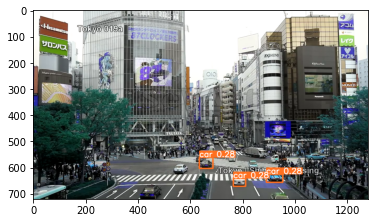

In [33]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()